In [17]:
import os
import numpy as np
import pandas as pd
from Bio.PDB.Polypeptide import three_to_index
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = np.array([10,6.180])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'

In [4]:
def annotate_gamma(gamma, n=400):
    count = 0
    # gamma = gamma_cutoff_dic[400]
    # gamma = gamma_cutoff_dic[300]
    info = []
    for direction in ["parallel", "anti"]:
        for i in range(n):
            for j in range(i, n):
                info.append([i, j, gamma[count], direction, count])
                if i != j:
                    info.append([j, i, gamma[count], direction, count])
                count += 1
    group_gamma_table = pd.DataFrame(info, columns=["g1", "g2", "gamma", "Direction", "index"])
    return group_gamma_table

In [6]:
a = np.loadtxt("/Users/weilu/Research/server/oct_2020/membrane_protein_structure_prediction/gamma_folder/ten_letter_all.dat")

In [45]:
aa = np.load("/Users/weilu/Research/server/oct_2020/curated_single_chain_optimization/optimization_msa_submode_22/with200_protein_gamma/average_A.npy")

In [31]:

# (IMV) (L) (FWY) (G) (P) (C) (A) (STNH) (RKQE) (D)
#   0    1    2    3   4   5   6     7     8     9
ten_letter_code_letters = {
    'I':0, 'M':0, 'V':0, 'L':1, 'F':2, 'W':2, 'Y':2, 'G':3, 'P':4, 'C':5, 'A':6,
    'S':7, 'T':7, 'N':7, 'H':7, 'R':8, 'K':4, 'Q':8, 'E':8, 'D':9,
}


def get_num_letter_based_index(res1_1, res1_2, n=10):
    index = ten_letter_code_letters[three_to_one(res1_1)]*n + ten_letter_code_letters[three_to_one(res1_2)]
    return index

In [47]:
amino_acids = list(ten_letter_code_letters.keys())
index_to_letter_dic = {}
for letter1 in amino_acids:
    for letter2 in amino_acids:
        res1_1 = one_to_three(letter1)
        res1_2 = one_to_three(letter2)
        index = get_num_letter_based_index(res1_1, res1_2)
        index_to_letter_dic[index] = f'{res1_1}_{letter1}_{res1_2}_{letter2}'


In [48]:

b = annotate_gamma(aa[690:], n=100)
b["Name1"] = b["g1"].apply(lambda x:index_to_letter_dic[x])
b["Name2"] = b["g2"].apply(lambda x:index_to_letter_dic[x])

In [54]:
b.query("g1==33 and g2 ==33")

,g1,g2,gamma,Direction,index,Name1,Name2
5511,33,33,-0.005318,parallel,2772,GLY_G_GLY_G,GLY_G_GLY_G
15511,33,33,-0.009499,anti,7822,GLY_G_GLY_G,GLY_G_GLY_G


In [50]:
b.sort_values("gamma")

,g1,g2,gamma,Direction,index,Name1,Name2
11491,77,7,-0.021266,anti,5799,HIS_H_HIS_H,VAL_V_HIS_H
11490,7,77,-0.021266,anti,5799,VAL_V_HIS_H,HIS_H_HIS_H
6105,74,37,-0.018537,parallel,3071,HIS_H_LYS_K,GLY_G_HIS_H
6104,37,74,-0.018537,parallel,3071,GLY_G_HIS_H,HIS_H_LYS_K
18917,70,67,-0.018250,anti,9542,HIS_H_VAL_V,ALA_A_HIS_H
...,...,...,...,...,...,...,...
10054,27,0,0.017984,anti,5077,TYR_Y_HIS_H,VAL_V_VAL_V
10039,0,20,0.018963,anti,5070,VAL_V_VAL_V,TYR_Y_VAL_V
10040,20,0,0.018963,anti,5070,TYR_Y_VAL_V,VAL_V_VAL_V
10139,0,70,0.021733,anti,5120,VAL_V_VAL_V,HIS_H_VAL_V


In [7]:

b = group_gamma_table = annotate_gamma(a[690:], n=100)
b["Name1"] = b["g1"].apply(lambda x:index_to_letter_dic[x])
b["Name2"] = b["g2"].apply(lambda x:index_to_letter_dic[x])

In [40]:
b.query("Name1=='GLY_G_GLY_G'")

,g1,g2,gamma,Direction,index,Name1,Name2
66,33,0,-0.148317,parallel,33,GLY_G_GLY_G,VAL_V_VAL_V
263,33,1,-0.067171,parallel,132,GLY_G_GLY_G,VAL_V_LEU_L
458,33,2,-0.079207,parallel,230,GLY_G_GLY_G,VAL_V_TYR_Y
651,33,3,0.191223,parallel,327,GLY_G_GLY_G,VAL_V_GLY_G
842,33,4,-0.024641,parallel,423,GLY_G_GLY_G,VAL_V_LYS_K
...,...,...,...,...,...,...,...
15634,33,95,0.165058,anti,7884,GLY_G_GLY_G,ASP_D_CYS_C
15636,33,96,0.375675,anti,7885,GLY_G_GLY_G,ASP_D_ALA_A
15638,33,97,0.095700,anti,7886,GLY_G_GLY_G,ASP_D_HIS_H
15640,33,98,0.238071,anti,7887,GLY_G_GLY_G,ASP_D_GLU_E


In [43]:
b.sort_values("gamma")

,g1,g2,gamma,Direction,index,Name1,Name2
11340,94,6,-2.179756,anti,5723,ASP_D_LYS_K,VAL_V_ALA_A
11339,6,94,-2.179756,anti,5723,VAL_V_ALA_A,ASP_D_LYS_K
19849,96,87,-2.098997,anti,10018,ASP_D_ALA_A,GLU_E_HIS_H
19848,87,96,-2.098997,anti,10018,GLU_E_HIS_H,ASP_D_ALA_A
16146,37,95,-1.694251,anti,8142,GLY_G_HIS_H,ASP_D_CYS_C
...,...,...,...,...,...,...,...
17212,47,58,1.253771,anti,8680,LYS_K_HIS_H,CYS_C_GLU_E
17213,58,47,1.253771,anti,8680,CYS_C_GLU_E,LYS_K_HIS_H
9711,83,83,1.304399,parallel,4897,GLU_E_GLY_G,GLU_E_GLY_G
9401,88,75,1.310084,parallel,4738,GLU_E_GLU_E,HIS_H_CYS_C


In [42]:
b["g1"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [9]:
b.sort_values("gamma")

,g1,g2,gamma,Direction,index
11340,94,6,-2.179756,anti,5723
11339,6,94,-2.179756,anti,5723
19849,96,87,-2.098997,anti,10018
19848,87,96,-2.098997,anti,10018
16146,37,95,-1.694251,anti,8142
...,...,...,...,...,...
17212,47,58,1.253771,anti,8680
17213,58,47,1.253771,anti,8680
9711,83,83,1.304399,parallel,4897
9401,88,75,1.310084,parallel,4738


In [3]:
def get_filtered_B_inv_lambda_and_P(filtered_lamb, cutoff_mode, P, method='extend_all_after_first_noisy_mode'):
    if method == 'zero_all_after_first_noisy_mode':
        filtered_lamb_inv = 1 / filtered_lamb
        # for "zeroing unreliable eigenvalues"
        filtered_lamb_inv[cutoff_mode:] = 0.0
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(filtered_lamb_inv), np.linalg.inv(P)))
        filtered_lamb = 1 / filtered_lamb_inv
    if method == 'extend_all_after_first_noisy_mode':
        # for "extending lowest reliable eigenvalue"
        filtered_lamb[cutoff_mode:] = filtered_lamb[cutoff_mode - 1]
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(1 / filtered_lamb), np.linalg.inv(P)))

    return filtered_B_inv, filtered_lamb, P


def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors


def get_A_B(pre, n=201, first_half=False, second_half=False,):
    # pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_3/gamma_mode_3"
    A = np.load(f"{pre}/average_A.npy", allow_pickle=True)
    B = np.load(f"{pre}/average_B.npy", allow_pickle=True)
    A_prime = np.load(f"{pre}/average_A_prime.npy", allow_pickle=True)
    half_B = np.load(f"{pre}/average_half_B.npy", allow_pickle=True)
    other_half_B = np.load(f"{pre}/average_other_half_B.npy", allow_pickle=True)
    std_half_B = np.load(f"{pre}/average_std_half_B.npy", allow_pickle=True)
#     A = A[:n]
#     B = B[:n,:n]
#     A_prime = A_prime[:n]
#     half_B = half_B[:n,:n]
#     other_half_B = other_half_B[:n, :n]
#     std_half_B = std_half_B[:n, :n]
    if second_half:
        half_n = int(n/2)
        A = A[half_n:]
        B = B[half_n:,half_n:]
        A_prime = A_prime[half_n:]
        half_B = half_B[half_n:,half_n:]
        other_half_B = other_half_B[half_n:, half_n:]
        std_half_B = std_half_B[half_n:, half_n:]
    A_B_dic = {}
    A_B_dic["A"] = A
    A_B_dic["B"] = B
    A_B_dic["half_B"] = half_B
    A_B_dic["other_half_B"] = other_half_B
    A_B_dic["std_half_B"] = std_half_B
    A_B_dic["A_prime"] = A_prime
    return A_B_dic

def get_gamma(A, B, A_prime, c=-100, cutoff_range=range(100, 210, 10)):
    gamma_cutoff_dic = {}
    for cutoff in list(cutoff_range):
        # cutoff = 400
        lamb, P = np.linalg.eig(B)
        lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
        filtered_lamb = np.copy(lamb)
        cutoff_mode = cutoff
        filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                           cutoff_mode, P)
        B_inv = filtered_B_inv
        lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
        gamma_new = B_inv.dot(A-A_prime*lambda_2)
        gamma_cutoff_dic[cutoff] = gamma_new
    return gamma_cutoff_dic

# Using Filtered MSA protein list

In [5]:
pre = "/Users/weilu/Research/server/sep_2020//curated_single_chain_optimization/optimization_msa_submode_12/gamma/"
six_letter_submode12 = get_A_B(pre, n=1332)
cutoff_range=list(range(300, 800, 100)) + list(range(932, 1332+20, 20))
A_B = six_letter_submode12
gamma_six_letter_submode12 = get_gamma(A_B['A'], A_B['B'], A_B['A_prime'], c=-0, cutoff_range=cutoff_range)


IndexError: index 699 is out of bounds for axis 0 with size 690

# compute Gamma

## n = 3000, six letter

In [153]:
pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_4/gamma"
six_letter_mode4 = get_A_B(pre, n=1332)
cutoff_range=list(range(300, 800, 100)) + list(range(932, 1332+20, 20))
gamma_six_letter_mode4 = get_gamma(six_letter_mode4['A'], six_letter_mode4['B'], six_letter_mode4['A_prime'], c=-10, cutoff_range=cutoff_range)

In [84]:
np.savetxt("/Users/weilu/Research/server/aug_2020/membrane_protein_structure_prediction/six_letter_1232.dat", -gamma_six_letter[1232])

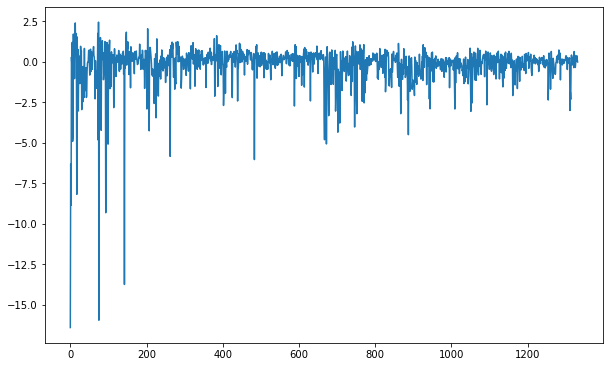

In [83]:
plt.plot(gamma_six_letter[1232])

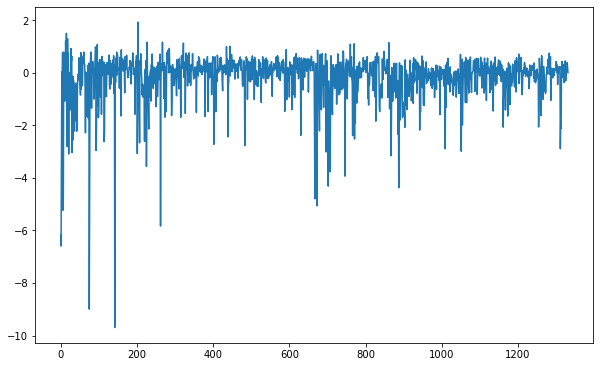

In [53]:
plt.plot(gamma_six_letter[1032])

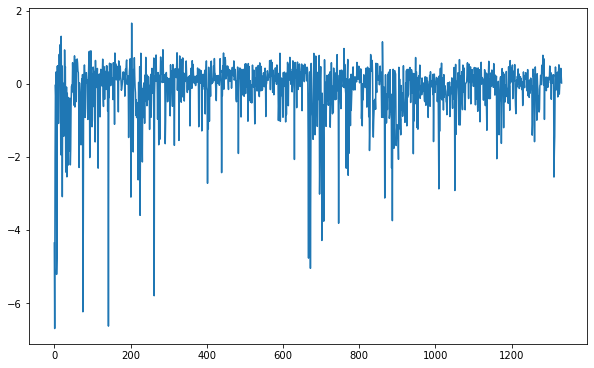

In [116]:
plt.plot(gamma_six_letter_mode4[932])

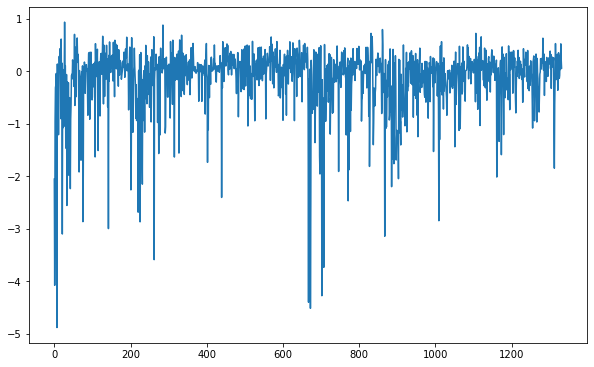

In [118]:
plt.plot(gamma_six_letter_mode4[700])

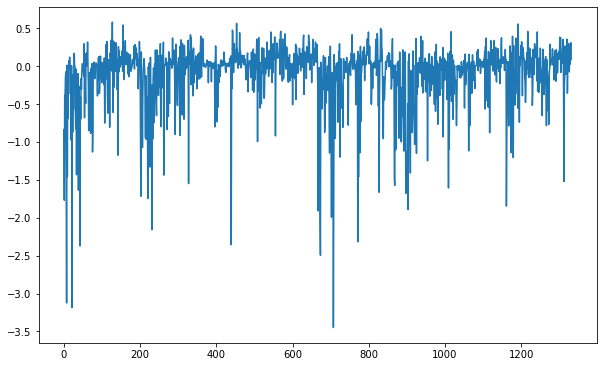

In [119]:
plt.plot(gamma_six_letter_mode4[400])

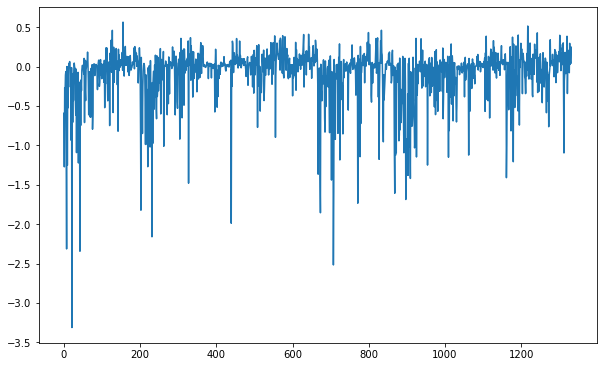

In [120]:
plt.plot(gamma_six_letter_mode4[300])

## n = 6000, six letter

In [155]:
# pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_5/gamma"
# six_letter_mode5 = get_A_B(pre, n=1332)
# cutoff_range=list(range(300, 800, 100)) + list(range(932, 1332+20, 20))
# gamma_six_letter_mode5 = get_gamma(six_letter_mode5['A'], six_letter_mode5['B'], six_letter_mode5['A_prime'], c=-10, cutoff_range=cutoff_range)

In [287]:
# compute again, with c = 0

pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_5/gamma"
six_letter_mode5 = get_A_B(pre, n=1332)
cutoff_range=list(range(300, 800, 100)) + list(range(932, 1332+20, 20))
gamma_six_letter_mode5 = get_gamma(six_letter_mode5['A'], six_letter_mode5['B'], six_letter_mode5['A_prime'], c=0, cutoff_range=cutoff_range)

In [202]:
np.savetxt("/Users/weilu/Research/server/aug_2020/membrane_protein_structure_prediction/six_letter_300.dat", -gamma_six_letter_mode5[300])

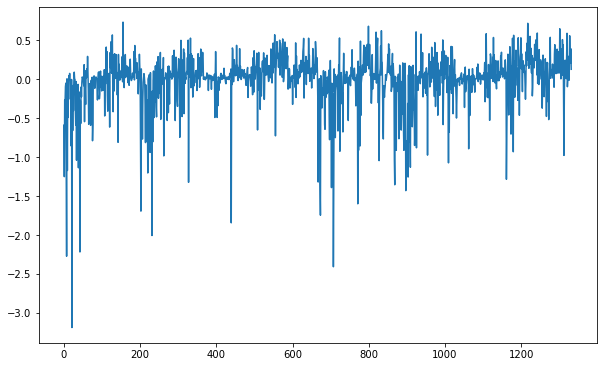

In [290]:
plt.plot(gamma_six_letter_mode5[300])

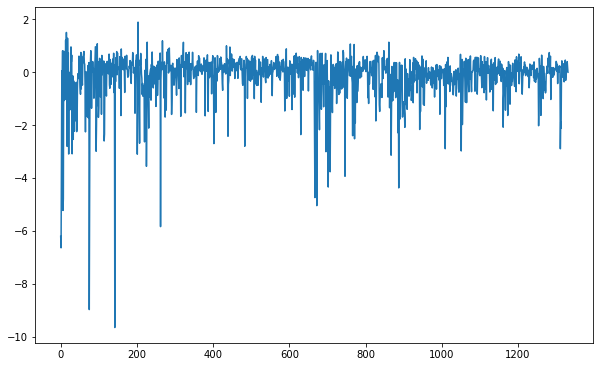

In [291]:
plt.plot(gamma_six_letter[1032])

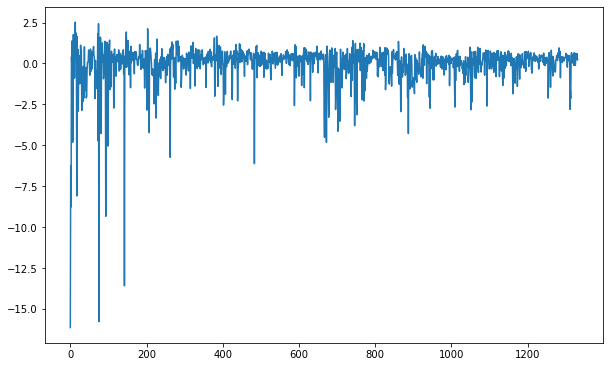

In [292]:
plt.plot(gamma_six_letter_mode5[1232])

## Compare mode 4 and mode 5

### n=3000, n=6000(mode 5) reaching the same results.

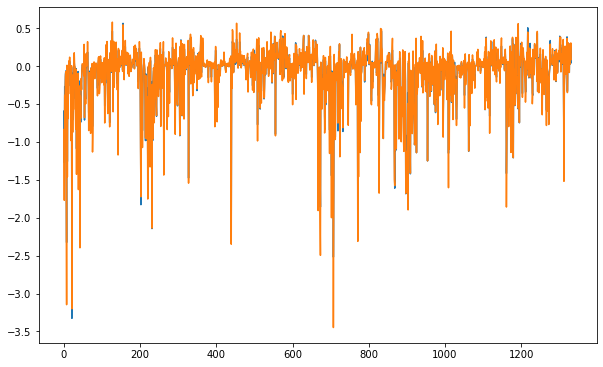

In [128]:
plt.plot(gamma_six_letter_mode5[300])
plt.plot(gamma_six_letter_mode5[400])

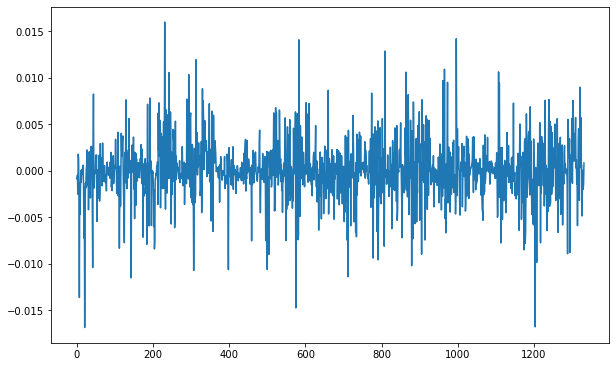

In [126]:
plt.plot(gamma_six_letter_mode5[300] - gamma_six_letter_mode4[300])

In [106]:
abs(six_letter_mode4['B']).max()

0.904569138396966

In [103]:
abs(six_letter_mode4['B'] - six_letter_mode5['B']).max()

0.0009099423758679448

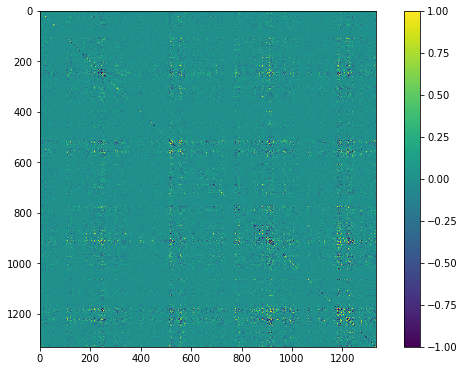

In [102]:
plt.imshow(1e4*(six_letter_mode4['B'] - six_letter_mode5['B']), vmin=-1, vmax=1)
plt.colorbar()

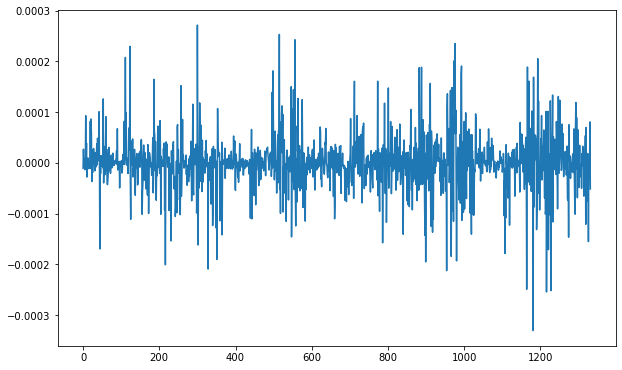

In [97]:
plt.plot(six_letter_mode4['A'] - six_letter_mode5['A'])

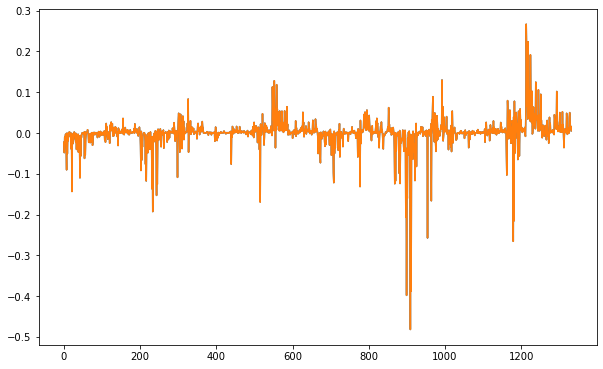

In [94]:
plt.plot(six_letter_mode4['A'])
plt.plot(six_letter_mode5['A'])

In [150]:
six_letter_mode5['A'][0]

-0.02241158562179528

### randomly split the pdb list into two list. and check their results.
### The are consistent.

In [206]:
pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_5/shuffled_half_pdb_list_gamma/"
six_letter_mode5_half = get_A_B(pre, n=1332)
cutoff_range=list(range(300, 800, 100)) + list(range(932, 1332+20, 20))
gamma_six_letter_mode5_half = get_gamma(six_letter_mode5_half['A'], six_letter_mode5_half['B'], six_letter_mode5_half['A_prime'], c=-10, cutoff_range=cutoff_range)

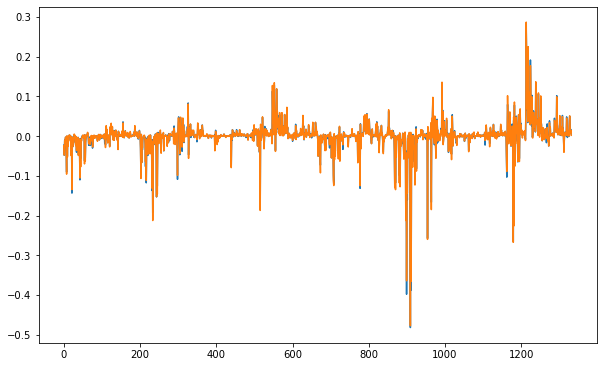

In [214]:
plt.plot(six_letter_mode5['A'])
plt.plot(six_letter_mode5_half['A'])

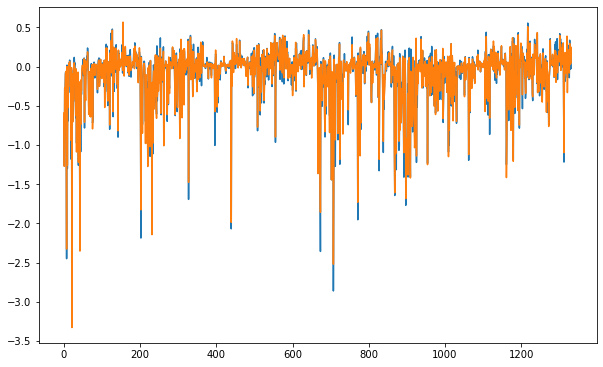

In [221]:
plt.plot(gamma_six_letter_mode5_half[300])
plt.plot(gamma_six_letter_mode5[300])

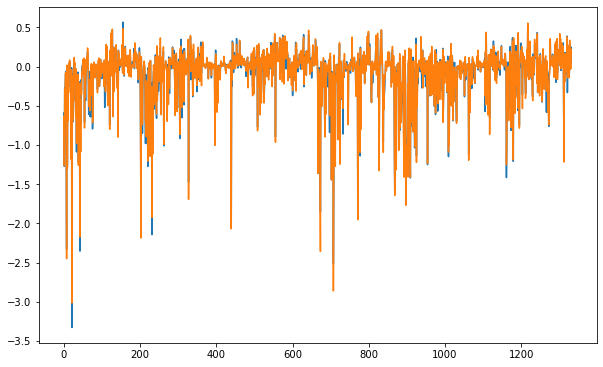

In [219]:
plt.plot(gamma_six_letter_mode5[300])
plt.plot(gamma_six_letter_mode5_half[300])

## check the complete info.csv 

In [267]:
data = pd.read_csv("/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_5/complete_info.csv")

In [272]:
data.query("res1_name=='GLY' and res1_2_name=='GLY' and res2_name=='GLY' and res2_2_name=='GLY'")

,Unnamed: 0,phi,res1,res1_2,res2,res2_2,direction,res1_name,res1_2_name,res2_name,res2_2_name,interaction_index,Protein
5165,5165,1.000000,169,173,266,270,parallel,GLY,GLY,GLY,GLY,0,4u4w_A
8558,8558,0.999999,111,115,131,127,anti,GLY,GLY,GLY,GLY,666,3nd0_A
9296,9296,1.000000,33,37,191,195,parallel,GLY,GLY,GLY,GLY,0,5tsa_A
9332,9332,1.000000,67,71,170,174,parallel,GLY,GLY,GLY,GLY,0,5tsa_A
9358,9358,1.000000,97,101,151,155,parallel,GLY,GLY,GLY,GLY,0,5tsa_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112387,112387,0.116112,11,15,56,60,parallel,GLY,GLY,GLY,GLY,0,4bem_J
112388,112388,1.000000,11,15,60,64,parallel,GLY,GLY,GLY,GLY,0,4bem_J
117414,117414,0.999999,106,110,125,121,anti,GLY,GLY,GLY,GLY,666,1kpl_A
126174,126174,1.000000,34,38,89,93,parallel,GLY,GLY,GLY,GLY,0,4gc0_A


## Use Convex optimization

In [550]:
A_B = six_letter_mode7
B = A_B['B']
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)
cutoff = n
c = -10
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = cutoff
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                   cutoff_mode, P)
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [551]:
gamma = ( A.dot(np.linalg.inv(B)) )

In [552]:
gamma.dot(A) / ((gamma.dot(B)).dot(gamma))**0.5

2.6678767064731277

In [553]:
# z score is much lower, here is 1.37 compared with unconstraint c.(2.66)
gamma_new.dot(A) / ((gamma_new.dot(B)).dot(gamma_new))**0.5

1.3759723511660813

In [650]:
# this is additional constraint that mandate lambda_1 = 1. but is not necessary.
abs((A - A_prime*lambda_2) - (B.dot(gamma_new))).sum()

3.8190381846520127e-13

In [554]:
A_prime.dot(gamma)

-0.6953015329776346

In [583]:
A.dot(gamma_new)

10.291984561597744

In [584]:
A_prime.dot(gamma_new)

-9.999999999999998

In [556]:
gamma.dot(A)

7.1175661209419046

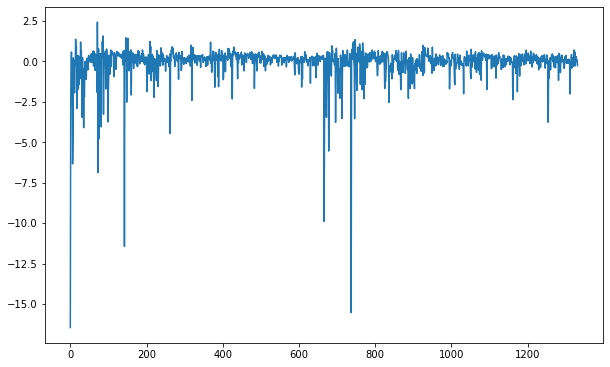

In [412]:
plt.plot(gamma)

In [567]:
from cvxopt import matrix, solvers
A_B = six_letter_mode7
B = A_B['B']
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(A_prime, (1,n))
# h = matrix(-10, (1, 1), 'd')

G = matrix(-A, (1,n))
h = matrix(-7.117566, (1, 1), 'd')

# G = matrix(np.array([A_prime, -A]), (2,n))
# h = matrix([-0, 0], (2, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  4.3375e+00  6.7751e+00  2e+00  4e-01  2e-15
 1:  7.1411e+00  7.1175e+00  2e-02  0e+00  2e-15
 2:  7.1178e+00  7.1176e+00  2e-04  5e-16  8e-16
 3:  7.1176e+00  7.1176e+00  2e-06  6e-16  1e-15
Optimal solution found.


In [568]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std)

2.6678767064731272 2.6678771010937505


In [569]:
A.dot(x)

7.11756717374107

In [570]:
A_prime.dot(x)

-0.6953016358235876

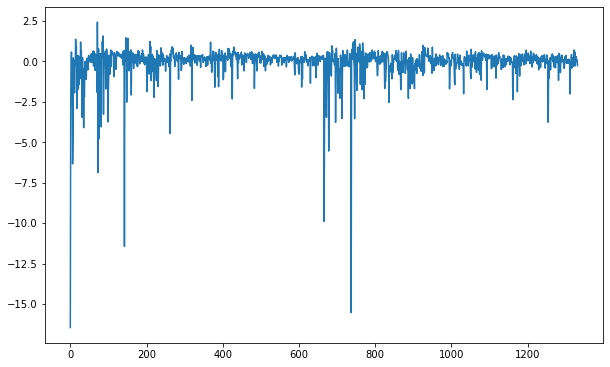

In [571]:
plt.plot(x)

### retreived results by inversion.

In [572]:
abs(gamma-x).sum()

9.473393126259455e-05

In [656]:
from cvxopt import matrix, solvers
A_B = six_letter_mode7
B = A_B['B']
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')

G = matrix(np.array([-A, A_prime]), (2,n))
h = matrix([-10.29198456, -10], (2, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  2.0418e+01  4.5436e+01  1e+01  6e-01  1e-14
 1:  5.9975e+01  5.5866e+01  4e+00  7e-16  2e-14
 2:  5.6000e+01  5.5947e+01  5e-02  2e-15  7e-15
 3:  5.5948e+01  5.5947e+01  5e-04  1e-15  4e-15
 4:  5.5947e+01  5.5947e+01  5e-06  3e-16  6e-15
Optimal solution found.


In [657]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std)

1.3759723015485985 7.47979058946588


In [658]:
A_prime.dot(x)

-10.000000549633873

In [659]:
A.dot(x)

10.291984672488915

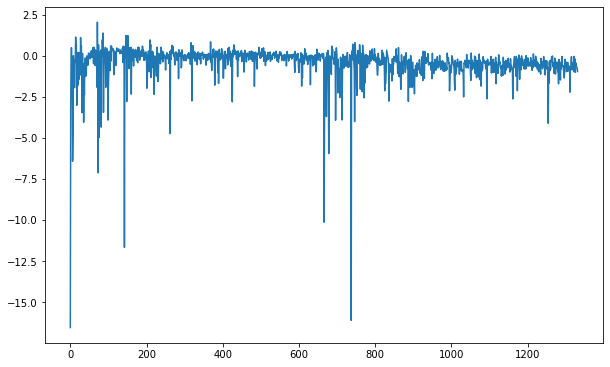

In [660]:
plt.plot(x)

### retreived result by inversion (with additional c constraint)

In [662]:
abs(gamma_new-x).sum()

3.100944761814597e-05

### But, the z score could be higher. if I make A_gamma larger.

In [663]:
from cvxopt import matrix, solvers
A_B = six_letter_mode7
B = A_B['B']
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')

G = matrix(np.array([-A, A_prime]), (2,n))
h = matrix([-20, -10], (2, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  4.4596e+01  7.9193e+01  9e+00  3e-01  1e-14
 1:  9.1983e+01  8.9011e+01  3e+00  1e-15  1e-14
 2:  8.9096e+01  8.9061e+01  4e-02  8e-16  8e-15
 3:  8.9061e+01  8.9061e+01  4e-04  1e-15  5e-15
 4:  8.9061e+01  8.9061e+01  4e-06  7e-16  5e-15
Optimal solution found.


In [664]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std)

2.119268758151145 9.437217427014513


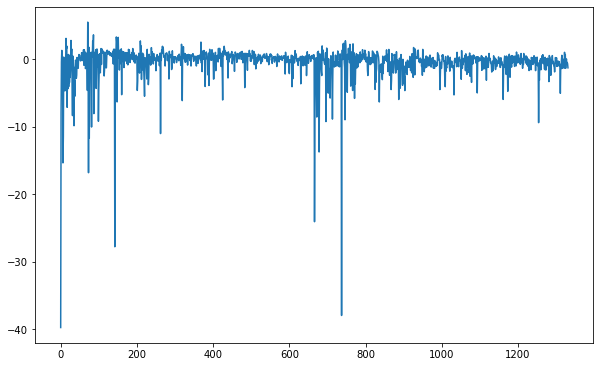

In [665]:
plt.plot(x)

In [669]:
from cvxopt import matrix, solvers
A_B = six_letter_mode7
B = A_B['B']
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')

G = matrix(np.array([-A, A_prime]), (2,n))
h = matrix([-100, -10], (2, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  8.5889e+02  1.3375e+03  5e+01  3e-01  4e-14
 1:  1.4077e+03  1.4046e+03  3e+00  9e-16  4e-13
 2:  1.4051e+03  1.4050e+03  2e-01  1e-15  4e-14
 3:  1.4050e+03  1.4050e+03  2e-02  2e-16  3e-12
 4:  1.4050e+03  1.4050e+03  6e-04  6e-16  2e-12
Optimal solution found.


In [673]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x))

2.667850372276367 37.48336175884509 100.00000062250463


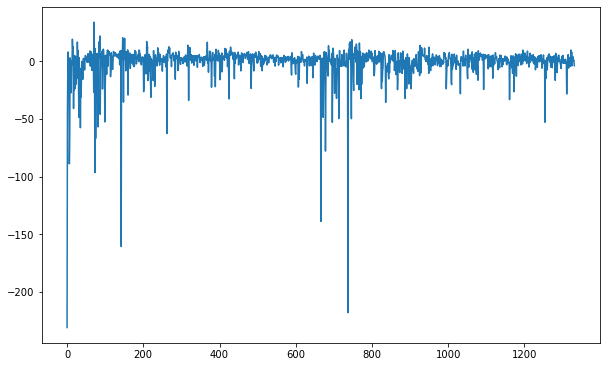

In [674]:
plt.plot(x)

In [700]:
# additional_constraint = np.zeros(n)
# additional_constraint[0] = -1

additional_constraint = np.diag([-1]*n)

In [718]:
from cvxopt import matrix, solvers
A_B = six_letter_mode7
B = A_B['B']
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')

G = matrix(np.concatenate([-A.reshape(1,n), A_prime.reshape(1,n), additional_constraint]), (2+n,n))
h = matrix([-3, -0]+[2]*n, (2+n, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  1.4500e+02 -5.9507e+03  2e+04  5e-01  4e+02
 1:  1.6700e+01 -1.2820e+03  1e+03  2e-02  2e+01
 2:  5.2920e+00 -9.5643e+01  1e+02  1e-03  1e+00
 3:  1.7786e+00 -1.0665e+01  1e+01  1e-04  1e-01
 4:  1.3621e+00 -2.9417e-01  2e+00  1e-05  1e-02
 5:  1.3082e+00  1.1445e+00  2e-01  1e-06  9e-04
 6:  1.3022e+00  1.2989e+00  3e-03  9e-09  8e-06
 7:  1.3019e+00  1.3019e+00  7e-05  1e-10  9e-08
 8:  1.3019e+00  1.3019e+00  2e-06  1e-12  1e-09
 9:  1.3019e+00  1.3019e+00  6e-08  1e-14  2e-11
Optimal solution found.


In [719]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x), A_prime.dot(x))

2.6292497322657784 1.1410099098721649 3.0000000000439893 -0.30805372402881287


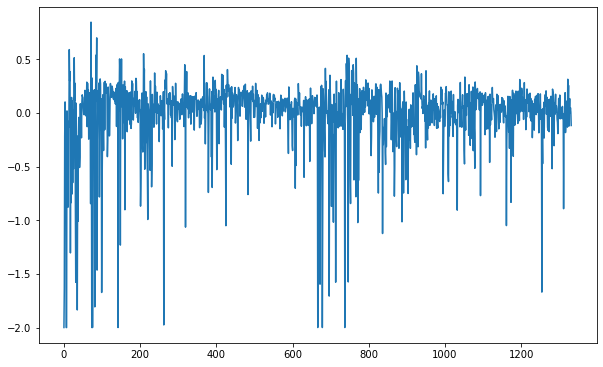

In [720]:
plt.plot(x)

In [764]:
from cvxopt import matrix, solvers
A_B = six_letter_mode7
B = A_B['B']
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')

G = matrix(np.concatenate([-A.reshape(1,n), A_prime.reshape(1,n)]), (2,n))
h = matrix([-10, -0], (2, 1), 'd')

# G = matrix(np.concatenate([-A.reshape(1,n), A_prime.reshape(1,n), additional_constraint]), (2+n,n))
# h = matrix([-10, -0]+[1]*n, (2+n, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  8.5702e+00  1.6202e+01  7e+00  5e-01  3e+00
 1:  1.4304e+01  1.3599e+01  7e-01  5e-16  1e-14
 2:  1.4052e+01  1.4013e+01  4e-02  2e-16  1e-15
 3:  1.4050e+01  1.4049e+01  4e-04  1e-15  2e-14
 4:  1.4050e+01  1.4050e+01  4e-06  4e-16  5e-15
Optimal solution found.


In [765]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x), A_prime.dot(x))

2.6678767064722337 3.7482991773352863 10.000000064101847 -0.9768853424340925


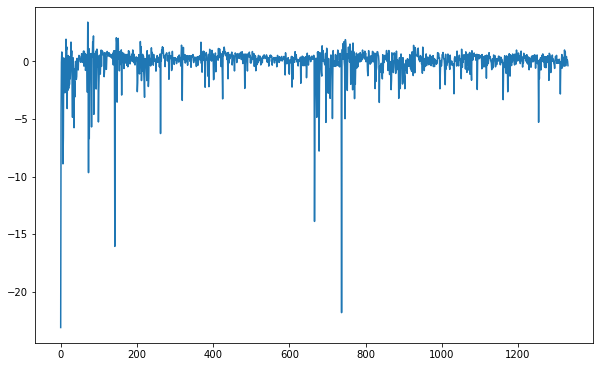

In [766]:
plt.plot(x)

## I applied additional constraint that the max absolute gamma will be 2.
### the Z score is not affected much

In [725]:
np.savetxt("/Users/weilu/Research/server/sep_2020/membrane_protein_structure_prediction/six_letter_limit_max.dat", -x)

In [732]:
from cvxopt import matrix, solvers
A_B = six_letter_mode7
B = A_B['B']
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')

G = matrix(np.concatenate([-A.reshape(1,n), A_prime.reshape(1,n), additional_constraint]), (2+n,n))
h = matrix([-3, -0]+[1]*n, (2+n, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  3.6703e+01 -1.6572e+03  2e+04  2e+00  2e+02
 1:  4.6351e+00 -5.9528e+03  1e+04  1e+00  2e+02
 2:  3.7248e+01 -7.1995e+03  1e+04  8e-01  1e+02
 3:  3.1034e+01 -8.8793e+02  9e+02  8e-03  9e-01
 4:  2.3146e+01 -1.8262e+02  2e+02  2e-03  2e-01
 5:  3.4491e+01 -1.6143e+02  2e+02  7e-16  1e-14
 6:  8.9691e+00 -3.5448e+01  4e+01  5e-16  2e-14
 7:  2.2329e+00 -4.7120e+00  7e+00  4e-16  2e-14
 8:  1.4448e+00  4.6983e-01  1e+00  2e-16  4e-14
 9:  1.3793e+00  1.3272e+00  5e-02  2e-16  4e-14
10:  1.3746e+00  1.3721e+00  2e-03  2e-16  2e-13
11:  1.3742e+00  1.3741e+00  7e-05  2e-16  1e-12
12:  1.3741e+00  1.3741e+00  3e-06  2e-16  3e-11
13:  1.3741e+00  1.3741e+00  1e-07  2e-16  4e-10
Optimal solution found.


In [733]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x), A_prime.dot(x))

2.5592189910249648 1.1722326266433434 3.0000000000047216 -0.333391945170542


In [736]:
np.savetxt("/Users/weilu/Research/server/sep_2020/membrane_protein_structure_prediction/six_letter_limit_max_1.dat", -x)

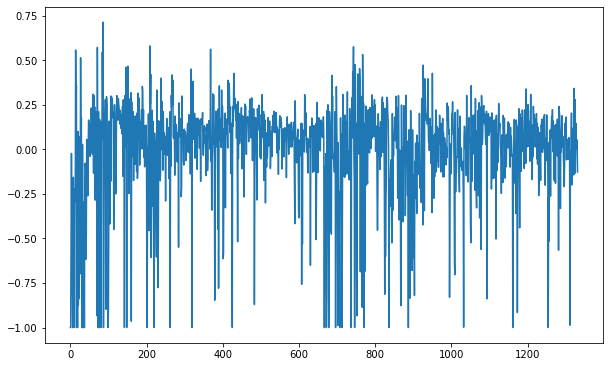

In [735]:

plt.plot(x)

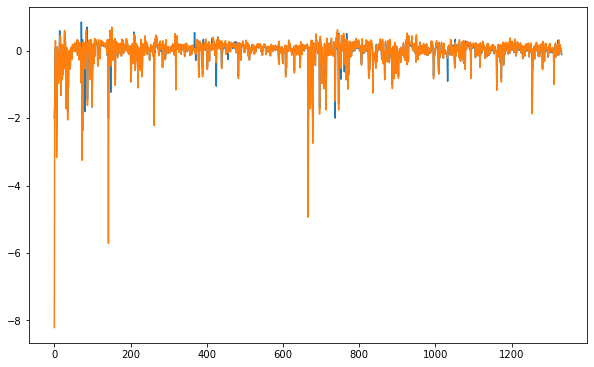

In [730]:

plt.plot(x)
plt.plot(gamma_six_letter_mode7[1232]/2)

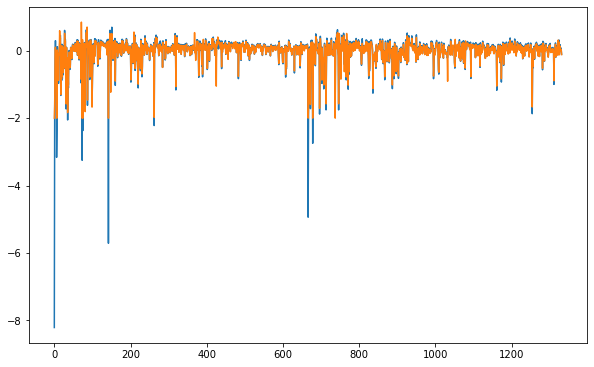

In [731]:
plt.plot(gamma_six_letter_mode7[1232]/2)
plt.plot(x)


In [726]:
# z score
e_std = (np.dot(gamma_six_letter_mode7[1232], B).dot(gamma_six_letter_mode7[1232]))**0.5
z = A.dot(gamma_six_letter_mode7[1232]) / e_std
print(z, e_std, A.dot(gamma_six_letter_mode7[1232]), A_prime.dot(gamma_six_letter_mode7[1232]))

2.618976479834875 2.6154450956754958 6.849789189873597 -3.5041414214731503e-16


### check result uisng MSA

In [253]:
pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_6/gamma/"
six_letter_mode6 = get_A_B(pre, n=1332)



In [254]:
cutoff_range=list(range(300, 800, 100)) + list(range(932, 1332+20, 20))
A_B = six_letter_mode6
gamma_six_letter_mode6 = get_gamma(A_B['A'], A_B['B'], A_B['A_prime'], c=-0, cutoff_range=cutoff_range)

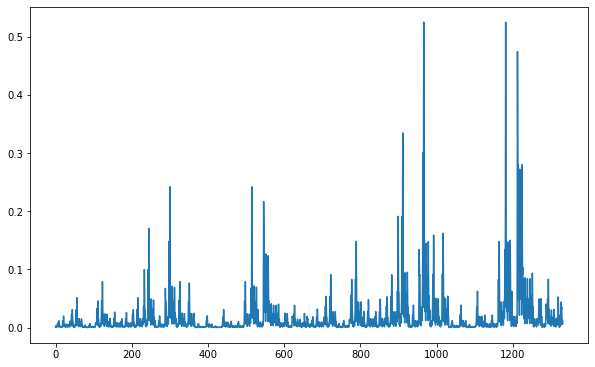

In [281]:
plt.plot(np.diag(six_letter_mode7['B']))

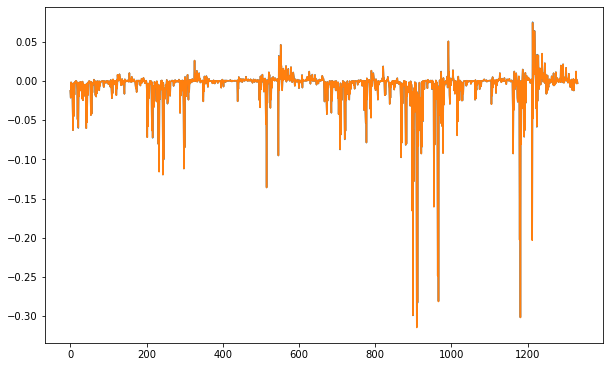

In [259]:
plt.plot(six_letter_mode7['A'])
plt.plot(six_letter_mode6['A'])

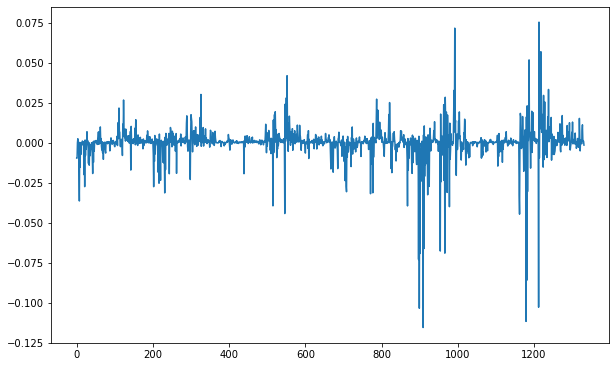

In [284]:
plt.plot(gamma_six_letter_mode7[1332] * six_letter_mode7['A_prime'])

In [274]:
gamma_six_letter_mode6[1332][:5]

array([-16.28520477,  -3.23873941,  -0.01795112,   0.59009281,
        -0.47683034])

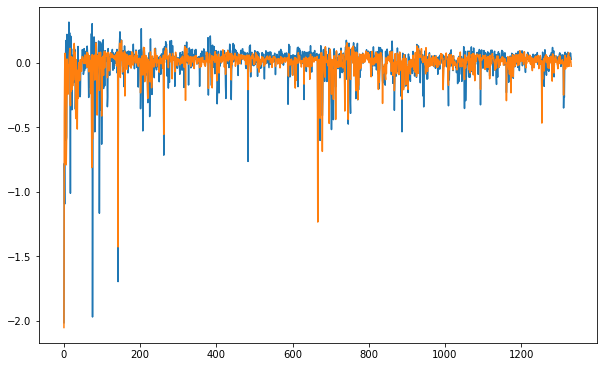

In [296]:
plt.plot(gamma_six_letter_mode5[1232]/8)
plt.plot(gamma_six_letter_mode7[1232]/8)


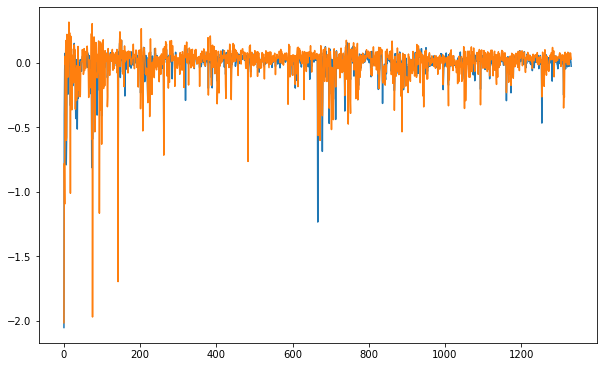

In [295]:
plt.plot(gamma_six_letter_mode7[1232]/8)
plt.plot(gamma_six_letter_mode5[1232]/8)

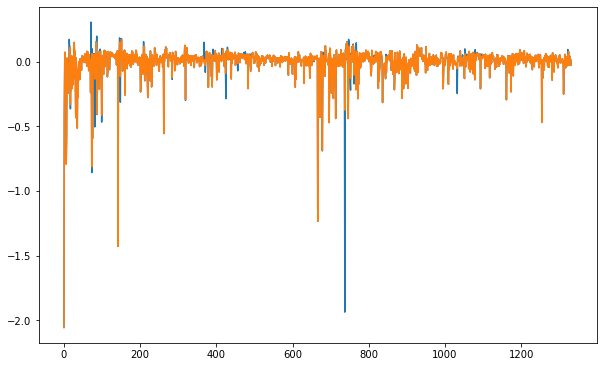

In [356]:
plt.plot(gamma_six_letter_mode7[1332]/8)
plt.plot(gamma_six_letter_mode7[1232]/8)


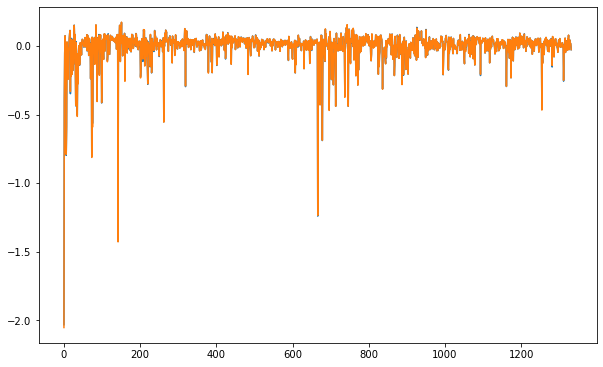

In [300]:
plt.plot(gamma_six_letter_mode6[1232]/8)
plt.plot(gamma_six_letter_mode7[1232]/8)


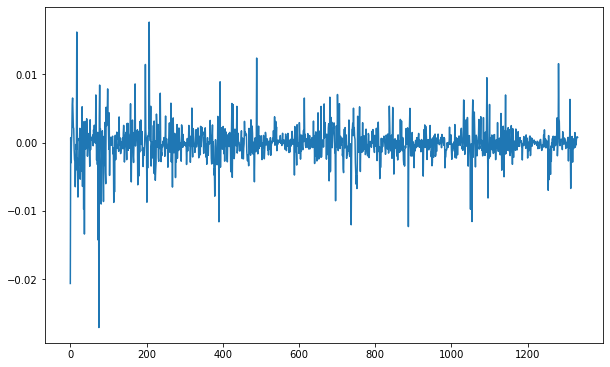

In [303]:
plt.plot(gamma_six_letter_mode7[1232]/8 - gamma_six_letter_mode6[1232]/8)

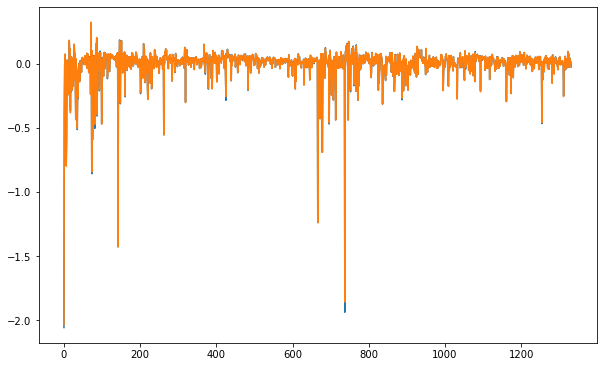

In [286]:
plt.plot(gamma_six_letter_mode7[1332]/8)
plt.plot(gamma_six_letter_mode6[1332]/8)

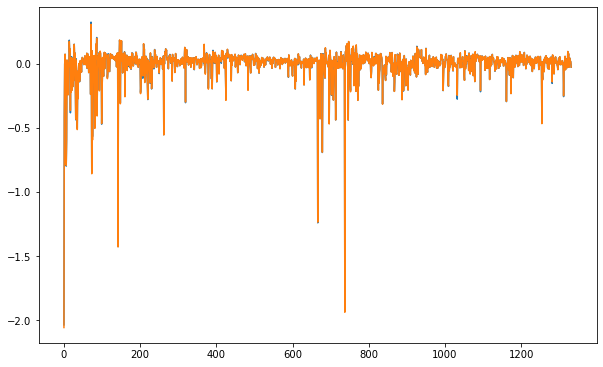

In [297]:
plt.plot(gamma_six_letter_mode6[1332]/8)
plt.plot(gamma_six_letter_mode7[1332]/8)

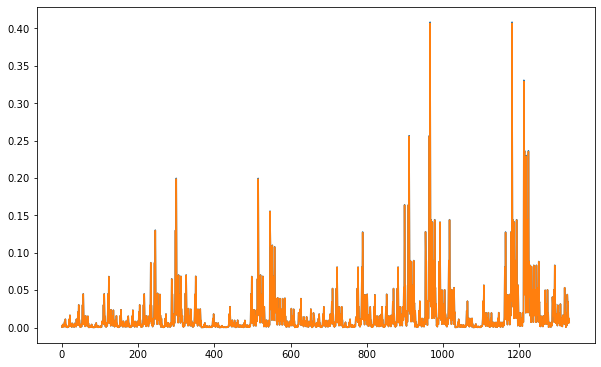

In [265]:
plt.plot(six_letter_mode7['A_prime'])
plt.plot(six_letter_mode6['A_prime'])


# Weighted A, B

In [767]:
pre = "/Users/weilu/Research/server/sep_2020//curated_single_chain_optimization/optimization_msa_mode_7/weighted_gamma/"
six_letter_mode7_weighted = get_A_B(pre, n=1332)



In [768]:
cutoff_range=list(range(300, 800, 100)) + list(range(932, 1332+20, 20)) + [1200]
A_B = six_letter_mode7_weighted
gamma_six_letter_mode7_weighted = get_gamma(A_B['A'], A_B['B'], A_B['A_prime'], c=-0, cutoff_range=cutoff_range)

In [784]:
gamma = gamma_six_letter_mode7_weighted[1332]
A_B['A'].dot(gamma) / np.sqrt(gamma.dot(A_B['B']).dot(gamma))

2.762521603971422

In [785]:
gamma = gamma_six_letter_mode7_weighted[1200]
A_B['A'].dot(gamma) / np.sqrt(gamma.dot(A_B['B']).dot(gamma))

2.7574562803288076

In [771]:
lamb, P = np.linalg.eig(six_letter_mode7_weighted['B'])
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

In [774]:
lamb1 =lamb

In [776]:
lamb, P = np.linalg.eig(six_letter_mode7['B'])
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

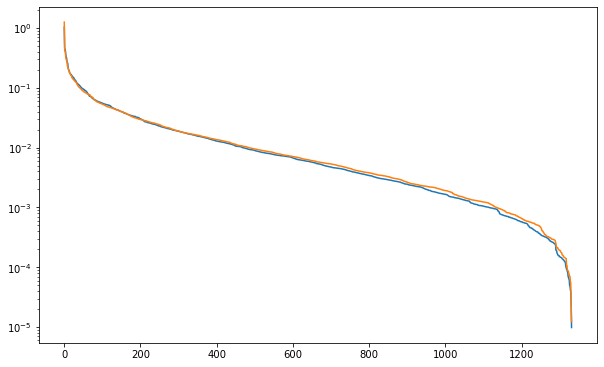

In [777]:
plt.plot(lamb1)
plt.plot(lamb)
plt.yscale("log")

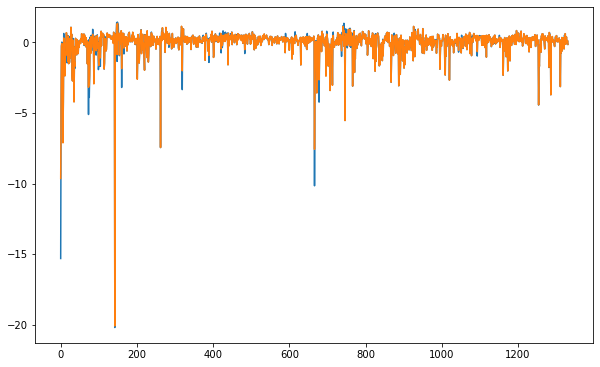

In [800]:
plt.plot(gamma_six_letter_mode7_weighted[1200])
plt.plot(gamma_six_letter_mode7_weighted[1132])

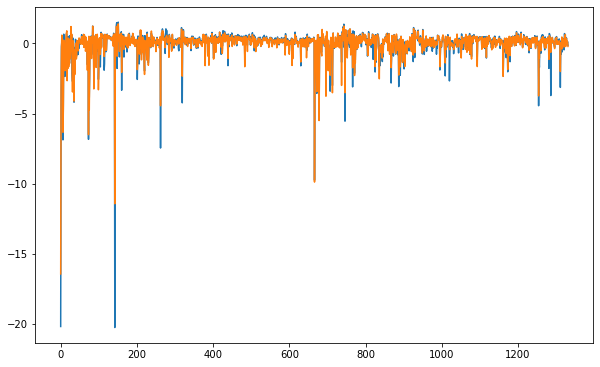

In [789]:
plt.plot(gamma_six_letter_mode7_weighted[1232])
plt.plot(gamma_six_letter_mode7[1232])

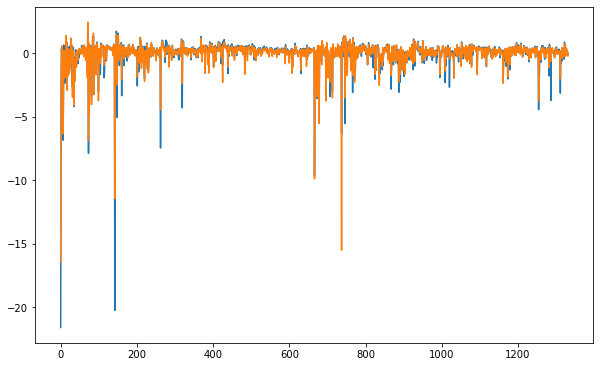

In [769]:
plt.plot(gamma_six_letter_mode7_weighted[1332])
plt.plot(gamma_six_letter_mode7[1332])

In [823]:
from cvxopt import matrix, solvers
A_B = six_letter_mode7_weighted
B = A_B['B']
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')

G = matrix(np.concatenate([-A.reshape(1,n), A_prime.reshape(1,n), additional_constraint]), (2+n,n))
h = matrix([-30, -0]+[15]*n, (2+n, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  7.2040e+03 -2.9813e+05  1e+06  4e-01  3e+03
 1:  1.3700e+03 -5.5054e+04  6e+04  2e-02  1e+02
 2:  6.5519e+02 -5.8193e+03  6e+03  3e-03  2e+01
 3:  2.1105e+02 -9.0520e+02  1e+03  4e-04  3e+00
 4:  1.2910e+02 -9.6492e+01  2e+02  6e-05  5e-01
 5:  1.2076e+02  7.2843e+01  5e+01  1e-05  8e-02
 6:  1.1979e+02  1.1245e+02  7e+00  1e-06  9e-03
 7:  1.1963e+02  1.1930e+02  3e-01  3e-08  2e-04
 8:  1.1961e+02  1.1961e+02  4e-03  3e-10  3e-06
 9:  1.1961e+02  1.1961e+02  5e-05  3e-12  3e-08
Optimal solution found.


In [824]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x), A_prime.dot(x))

2.743036903958834 10.936783229186794 30.000000008257445 -4.925688700617105


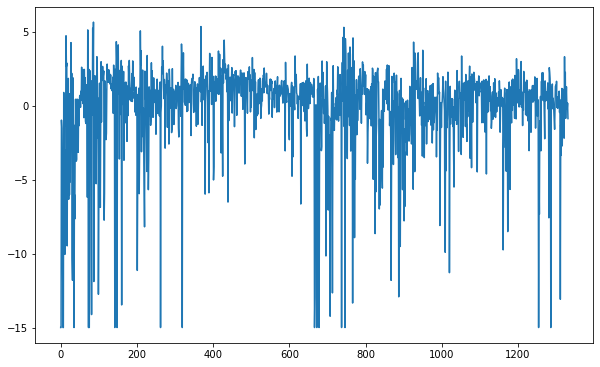

In [825]:
plt.plot(x)

In [831]:
B = six_letter_mode7_weighted['B']
cutoff = 1200
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = cutoff
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                   cutoff_mode, P)

In [832]:
B_new = np.linalg.inv(filtered_B_inv)

In [846]:
def getPCA(matrix):
    eVal, eVec=np.linalg.eigh(matrix)
    indices=eVal.argsort()[::-1]
    eVal, eVec = eVal[indices], eVec[:,indices]
    eVal=np.diagflat(eVal)
    return eVal, eVec
# denoising by constant residueal eigenvalue
def denoisedCorr(eVal, eVec, nFacts):
    eVal_ = np.diag(eVal).copy()
    eVal_[nFacts:] = eVal_[nFacts:].sum()/float(eVal_.shape[0]-nFacts)
    # eVal_[nFacts:] = eVal_[nFacts-1]
    eVal_=np.diag(eVal_)
    corr1 = np.dot(eVec, eVal_).dot(eVec.T)
    # corr1 = cov2corr(corr1)
    return corr1

In [847]:
eVal0, eVec0 = getPCA(B)
B_denoised = denoisedCorr(eVal0, eVec0, cutoff)

In [845]:
abs(B_denoised-B_new).max()

3.4416913763379853e-15

In [872]:
from cvxopt import matrix, solvers
A_B = six_letter_mode7_weighted
B = B_new
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')

G = matrix(np.concatenate([-A.reshape(1,n), -A_prime.reshape(1,n), additional_constraint]), (2+n,n))
h = matrix([-2, 0]+[2]*n, (2+n, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  1.2761e+02 -1.7967e+03  9e+04  6e+00  2e+02
 1:  5.8703e+01 -1.7829e+04  7e+04  5e+00  2e+02
 2:  1.0464e+03 -3.1697e+04  6e+04  3e+00  1e+02
 3:  2.0495e+03 -1.7956e+04  3e+04  1e+00  3e+01
 4:  7.6268e+02 -2.0239e+03  3e+03  2e-15  5e-13
 5:  2.5708e+02 -7.8579e+02  1e+03  1e-15  2e-13
 6:  2.2217e+02 -6.9045e+02  9e+02  7e-16  6e-14
 7:  4.4780e+01 -1.6276e+02  2e+02  6e-16  1e-13
 8:  4.7419e+00 -2.6939e+01  3e+01  3e-16  2e-14
 9:  1.1477e+00 -7.3637e+00  9e+00  2e-16  6e-15
10:  5.6634e-01 -2.8234e-01  8e-01  2e-16  1e-14
11:  5.4582e-01  5.2564e-01  2e-02  2e-16  1e-14
12:  5.4536e-01  5.4502e-01  3e-04  2e-16  6e-14
13:  5.4532e-01  5.4532e-01  9e-06  2e-16  1e-12
14:  5.4532e-01  5.4532e-01  5e-07  2e-16  2e-11
Optimal solution found.


2.7083412797620356 0.7384593717910791 2.00000000004892 2.2532753988406887e-10


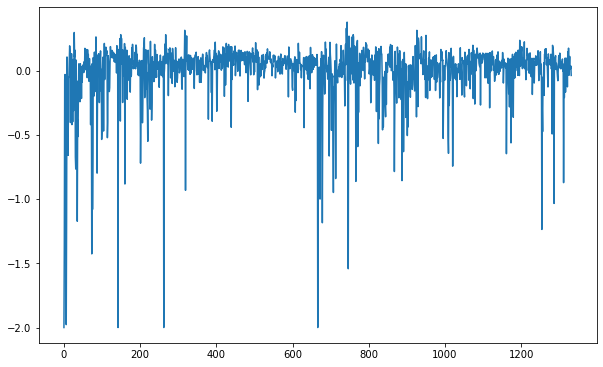

In [873]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x), A_prime.dot(x))
plt.plot(x)

In [874]:
np.savetxt("/Users/weilu/Research/server/sep_2020/membrane_protein_structure_prediction/six_letter_weighted.dat", -x)

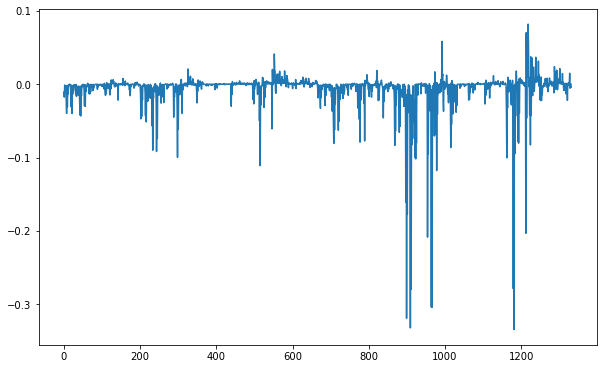

In [875]:
plt.plot(six_letter_mode7_weighted['A'])

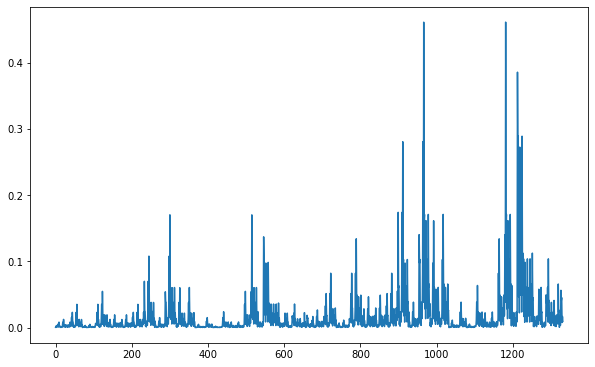

In [876]:
plt.plot(six_letter_mode7_weighted['A_prime'])

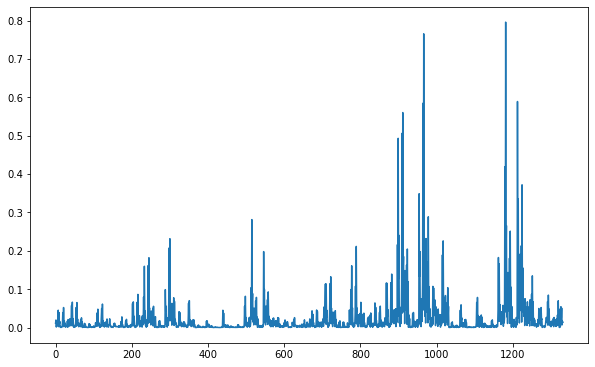

In [882]:
# A' - A = A_native
A_B = six_letter_mode7_weighted
A = A_B['A']
A_prime = A_B['A_prime']
A_native = A_prime - A
plt.plot(A_prime - A)

In [883]:
A_native[0]

0.011163848373663085

In [880]:
A[0]

-0.010766266700042031

In [881]:
A_prime[0]

0.00039758167362105356

In [884]:
A.sum()

-9.316731404267383

In [885]:
A_native.sum()

33.30973093144256

In [886]:
A_prime.sum()

23.99299952717518

In [851]:
from cvxopt import matrix, solvers
A_B = six_letter_mode7_weighted
B = B_denoised
A = A_B['A']
A_prime = A_B['A_prime']
n = len(A_prime)

Q = 2*matrix(B)
p = matrix(np.zeros(n))
# G = matrix(-A, (1,n))
# h = matrix(-7.117566, (1, 1), 'd')

G = matrix(np.concatenate([-A.reshape(1,n), A_prime.reshape(1,n), additional_constraint]), (2+n,n))
h = matrix([-30, -0]+[15]*n, (2+n, 1), 'd')
sol=solvers.qp(Q, p, G=G, h=h)
x = np.array(sol['x']).flatten()

     pcost       dcost       gap    pres   dres
 0:  7.2043e+03 -2.9814e+05  1e+06  4e-01  3e+03
 1:  1.3701e+03 -5.5054e+04  6e+04  2e-02  1e+02
 2:  6.5530e+02 -5.8191e+03  6e+03  3e-03  2e+01
 3:  2.1116e+02 -9.0516e+02  1e+03  4e-04  3e+00
 4:  1.2916e+02 -9.6935e+01  2e+02  6e-05  5e-01
 5:  1.2037e+02  8.1069e+01  4e+01  6e-06  4e-02
 6:  1.1955e+02  1.1869e+02  9e-01  1e-07  8e-04
 7:  1.1948e+02  1.1947e+02  2e-02  1e-09  1e-05
 8:  1.1948e+02  1.1948e+02  4e-04  1e-11  1e-07
 9:  1.1948e+02  1.1948e+02  1e-05  1e-13  1e-09
Optimal solution found.


2.7445812225357895 10.930629326632697 30.00000000037512 -4.923949840451778


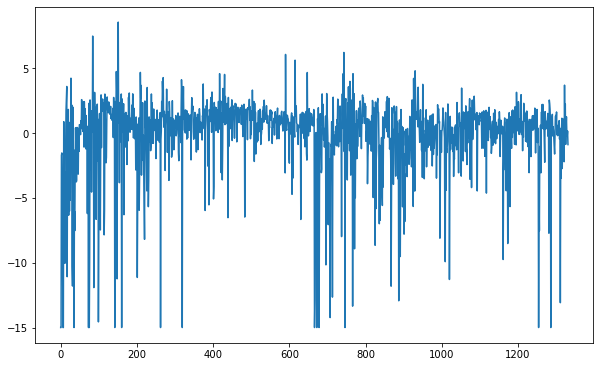

In [852]:
# z score
e_std = (np.dot(x, B).dot(x))**0.5
z = A.dot(x) / e_std
print(z, e_std, A.dot(x), A_prime.dot(x))
plt.plot(x)

In [ ]:
plt.plot(gamma_six_letter_mode7[700])

In [222]:
pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_7/shuffled_half_pdb_list_gamma/"
six_letter_mode7 = get_A_B(pre, n=1332)


In [248]:
cutoff_range=list(range(300, 800, 100)) + list(range(932, 1332+20, 20))
gamma_six_letter_mode7 = get_gamma(six_letter_mode7['A'], six_letter_mode7['B'], six_letter_mode7['A_prime'], c=-0, cutoff_range=cutoff_range)

In [252]:
np.savetxt("/Users/weilu/Research/server/aug_2020/membrane_protein_structure_prediction/six_letter_300_msa_c_0.dat", -gamma_six_letter_mode7[300])

In [304]:
np.savetxt("/Users/weilu/Research/server/aug_2020/membrane_protein_structure_prediction/six_letter_1232_msa_c_0.dat", -gamma_six_letter_mode7[1232]/8)

In [261]:
six_letter_mode7['A'][:5]

array([-0.01265302, -0.02144713, -0.00166165, -0.00993588, -0.00415066])

In [262]:
six_letter_mode7['A_prime'][:5]

array([0.00058186, 0.00296492, 0.00041047, 0.00428333, 0.00147971])

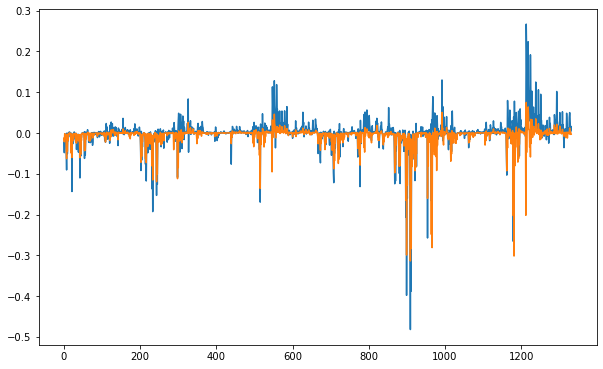

In [226]:
plt.plot(six_letter_mode5['A'])
plt.plot(six_letter_mode7['A'])

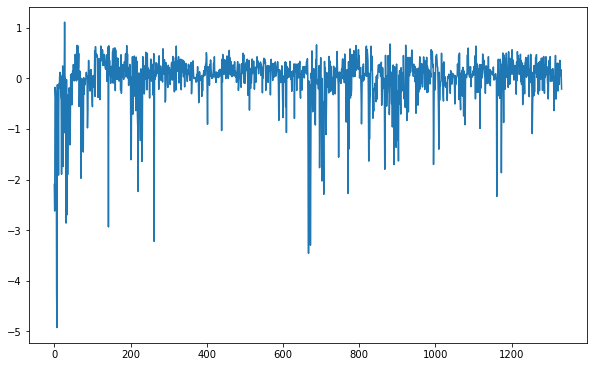

In [249]:
plt.plot(gamma_six_letter_mode7[700])

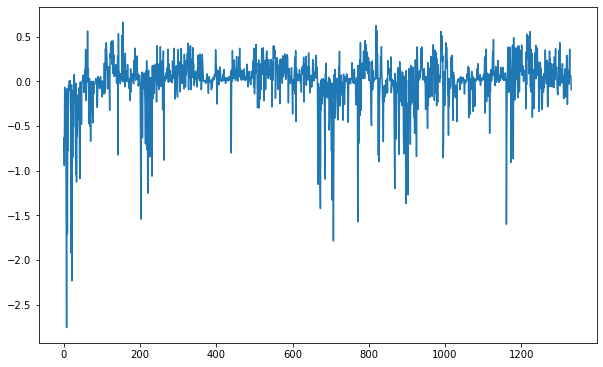

In [250]:
plt.plot(gamma_six_letter_mode7[300])

In [251]:
six_letter_mode7["A_prime"].dot(gamma_six_letter_mode7[300])

1.0755285551056204e-16

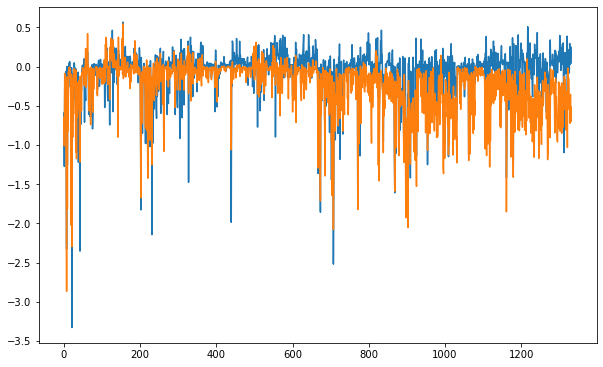

In [223]:
plt.plot(gamma_six_letter_mode5[300])
plt.plot(gamma_six_letter_mode7[300])

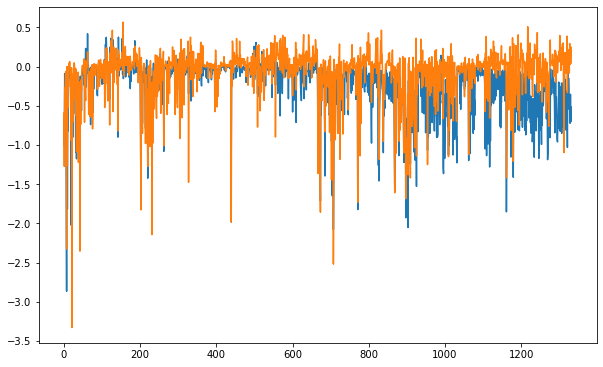

In [237]:
plt.plot(gamma_six_letter_mode7[300])
plt.plot(gamma_six_letter_mode5[300])


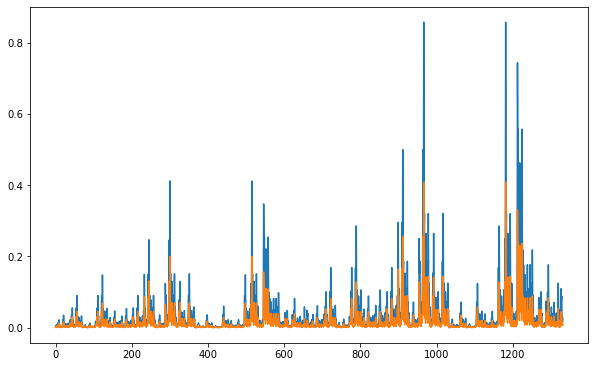

In [242]:
plt.plot(six_letter_mode5['A_prime'])
plt.plot(six_letter_mode7['A_prime'])

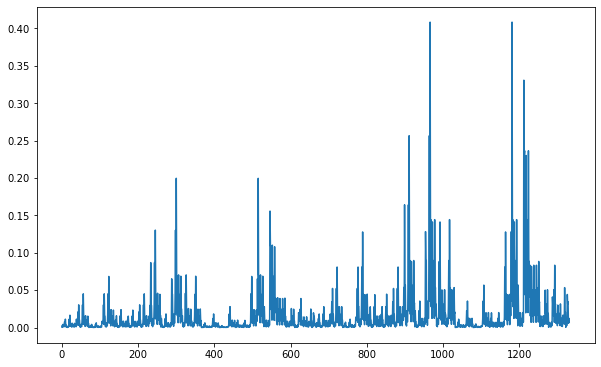

In [243]:
plt.plot(six_letter_mode7['A_prime'])

### seperate parallel, and anti

In [240]:
pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_7/shuffled_half_pdb_list_gamma/"
six_letter_mode7_anti = get_A_B(pre, n=1332, second_half=True)


In [246]:
cutoff_range=list(range(100, 700, 100)) 
A_B = six_letter_mode7_anti
gamma_six_letter_mode7_anti = get_gamma(A_B['A'], A_B['B'], A_B['A_prime'], c=-0, cutoff_range=cutoff_range)

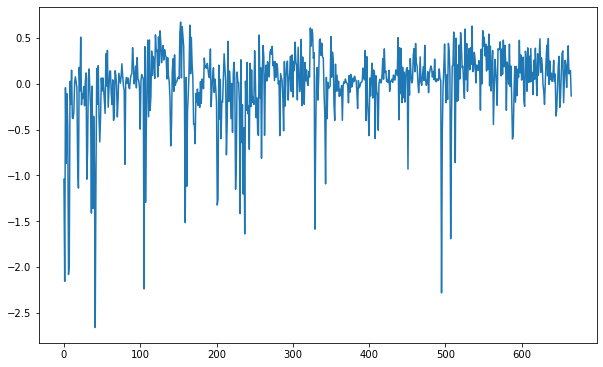

In [247]:
plt.plot(gamma_six_letter_mode7_anti[300])

In [ ]:
plt.plot(gamma_six_letter_mode7[1332])

### check the eigenvalue decomposition

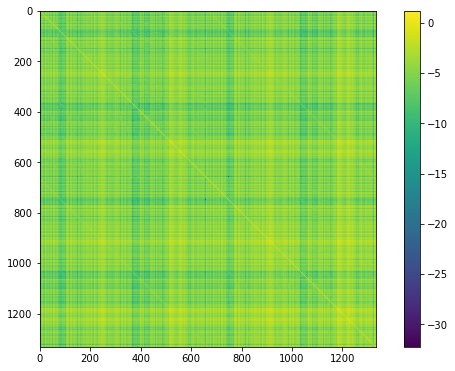

In [182]:
std_half_B = six_letter_mode5["std_half_B"]
plt.imshow(np.log(std_half_B+1e-14))
plt.colorbar()

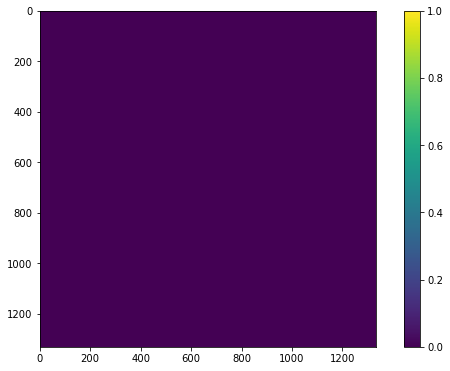

In [178]:
std_half_B = six_letter_mode5["std_half_B"]
plt.imshow((std_half_B==0).astype(int))
plt.colorbar()

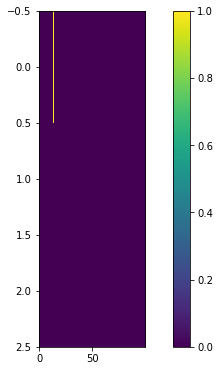

In [177]:
std_half_B = six_letter_mode5["std_half_B"]
plt.imshow((std_half_B==0)[:3,400:500].astype(int), aspect=105)
plt.colorbar()

In [165]:
ind = np.unravel_index(np.argmax(std_half_B==0), std_half_B.shape)

In [166]:
ind

(0, 413)

In [108]:
B = six_letter_mode5["B"]
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

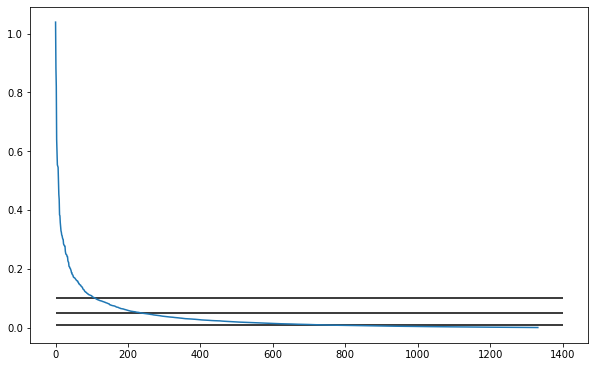

In [113]:
plt.plot(lamb)
plt.hlines(0.1, 0, 1400)
plt.hlines(0.05, 0, 1400)
plt.hlines(0.01, 0, 1400)

In [188]:
half_B.max()

2.012206521345856

In [185]:
std_half_B.max()

3.3632845969715763

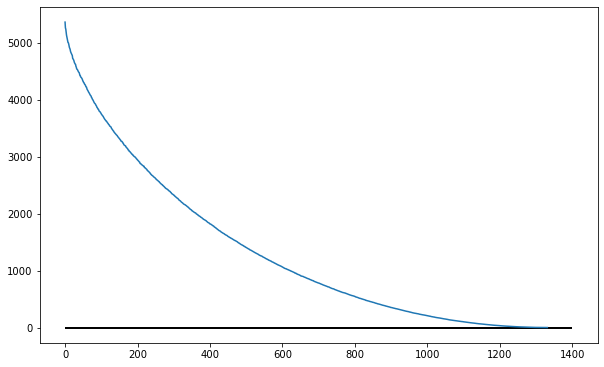

In [201]:
A = np.random.randn(total_phis, total_phis)
B = np.dot(A,A.transpose())
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
plt.plot(lamb)
plt.hlines(0.1, 0, 1400)
plt.hlines(0.05, 0, 1400)
plt.hlines(0.01, 0, 1400)

In [195]:
noise_iterations = 1
total_phis = 1332
num_decoys = 6000
half_B = six_letter_mode5["half_B"]
std_half_B = six_letter_mode5["std_half_B"]
other_half_B = six_letter_mode5["other_half_B"]
for i_noise in range(noise_iterations):
    noisy_B = np.zeros((total_phis, total_phis))
    for i in range(total_phis):
        for j in range(i, total_phis):
            # random_B_ij = np.random.normal(
            #     loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys)**0.5)
            # random_B_ij = np.random.normal(
            #     loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys))
            random_B_ij = np.random.normal(
                loc=half_B[i][j], scale=std_half_B[i][j])
            noisy_B[i][j] = noisy_B[j][i] = random_B_ij - other_half_B[i][j]

    noisy_lamb, noisy_P = np.linalg.eig(noisy_B)
    noisy_lamb, noisy_P = sort_eigenvalues_and_eigenvectors(
        noisy_lamb, noisy_P)

In [196]:
relative_error_threshold = 0.5
try:
    cutoff_mode = np.where(
        np.abs(lamb - noisy_lamb) / lamb > relative_error_threshold)[0][0]
except IndexError:
    cutoff_mode = len(lamb)

In [197]:
cutoff_mode

0

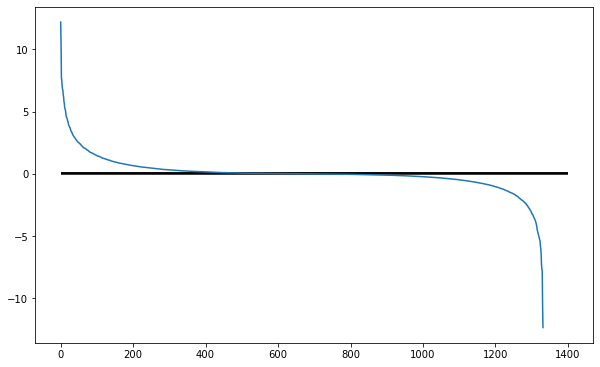

In [198]:
plt.plot(noisy_lamb)
plt.hlines(0.1, 0, 1400)
plt.hlines(0.05, 0, 1400)
plt.hlines(0.01, 0, 1400)

## Compute Z score for each protein

In [350]:
# read A, B
pdb = "1ap9_A"
info_ = []
A_B = np.load(f"/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_7/A_B_dic/{pdb}.npy", allow_pickle=True).item()
gamma = -np.loadtxt("/Users/weilu/Research/server/aug_2020/membrane_protein_structure_prediction/six_letter_1232_msa_c_0.dat")
e_diff = np.dot(A_B['A'], gamma)
e_decoy = np.dot(A_B['A_prime'], gamma)
e_native = e_decoy - e_diff
e_std = ((np.dot(gamma, A_B['B'])).dot(gamma))**0.5
z = e_diff / e_std
info_.append([pdb, e_native, e_decoy, e_diff, e_std, z])
data = pd.DataFrame(info_, columns=["Protein", "E_native", "E_decoy", "E_diff", "E_std", "Z"])

In [354]:
z

1.5947133453696727

# combine Gamma, and their corresponding interaction residues

In [66]:
from Bio.PDB.Polypeptide import three_to_index
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one

six_letter_code_letters = {
    'I':3, 'M':3, 'L':3, 'V':3, 'F':5, 'Y':5, 'W':5, 'G':0, 'P':2, 'C':1, 'A':1, 'S':1, 'T':1, 'N':4, 'H':4, 'Q':4, 'E':4, 'D':4, 'R':4, 'K':4
}


def get_six_letter_based_index(res1_1, res1_2):
    index = six_letter_code_letters[three_to_one(res1_1)]*6 + six_letter_code_letters[three_to_one(res1_2)]
    return index

def get_overall_index_v8(index1, index2, direction, n):
    # n =36
    # plus 1, total parameters. 401*400/2 = 80200
    n_shift = int((n+1)*n/2)
    new_index1 = index1
    new_index2 = index2
    if new_index1 > new_index2:
        new_index1, new_index2 = new_index2, new_index1
    overall_index = ((2*n-(new_index1-1))*(new_index1)/2 + new_index2 - new_index1)
    if direction == "anti":
        overall_index += n_shift
    return int(overall_index)

def get_interaction_index_from_four_residues_v8(res1_1, res1_2, res2_1, res2_2, direction):

    index1 = get_six_letter_based_index(res1_1, res1_2)
    if direction == "parallel":
        index2 = get_six_letter_based_index(res2_1, res2_2)
    elif direction == "anti":
        index2 = get_six_letter_based_index(res2_2, res2_1)
    else:
        print("unknown direction")
        raise
    index = get_overall_index_v8(index1, index2, direction, n=36)

    return index

In [311]:
def annotate_gamma(gamma, n=400):
    count = 0
    # gamma = gamma_cutoff_dic[400]
    # gamma = gamma_cutoff_dic[300]
    info = []
    for direction in ["parallel", "anti"]:
        for i in range(n):
            for j in range(i, n):
                info.append([i, j, gamma[count], direction, count])
                if i != j:
                    info.append([j, i, gamma[count], direction, count])
                count += 1
    group_gamma_table = pd.DataFrame(info, columns=["g1", "g2", "gamma", "Direction", "index"])
    return group_gamma_table

In [70]:
data = pd.read_csv("/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_5/complete_info.csv")

In [312]:

group_gamma_table = annotate_gamma(gamma_six_letter_mode7[1232]/8, n=36)

In [313]:
group_gamma_table.sort_values("gamma")

,g1,g2,gamma,Direction,index
0,0,0,-2.052716,parallel,0
280,8,4,-1.427963,parallel,142
279,4,8,-1.427963,parallel,142
1296,0,0,-1.234670,anti,666
144,4,2,-0.812576,parallel,73
...,...,...,...,...,...
166,15,2,0.154130,parallel,84
1447,2,8,0.155151,anti,743
1448,8,2,0.155151,anti,743
297,4,17,0.173841,parallel,151


In [310]:
data.query("interaction_index==151")

,Unnamed: 0,phi,res1,res1_2,res2,res2_2,direction,res1_name,res1_2_name,res2_name,res2_2_name,interaction_index,Protein
94758,94758,0.723597,23,27,81,85,parallel,GLY,ARG,PRO,TYR,151,6khi_D
97708,97708,0.294986,73,77,115,119,parallel,GLY,ASN,PRO,PHE,151,5y83_A


In [142]:

group_gamma_table = annotate_gamma(gamma_six_letter_mode5[932], n=36)

In [143]:
group_gamma_table.query("count==0")

,g1,g2,gamma,Direction,count
0,0,0,-4.361325,parallel,0


In [144]:
group_gamma_table.sort_values("gamma")

,g1,g2,gamma,Direction,count
1,0,1,-6.747211,parallel,1
2,1,0,-6.747211,parallel,1
280,8,4,-6.591903,parallel,142
279,4,8,-6.591903,parallel,142
147,2,6,-6.217534,parallel,75
...,...,...,...,...,...
1680,5,30,1.136804,anti,861
36,18,0,1.284916,parallel,18
35,0,18,1.284916,parallel,18
400,8,6,1.634755,parallel,203


In [168]:
data.query("interaction_index==413")

,Unnamed: 0,phi,res1,res1_2,res2,res2_2,direction,res1_name,res1_2_name,res2_name,res2_2_name,interaction_index,Protein
14569,14569,0.974432,71,75,263,267,parallel,PHE,PHE,PRO,ALA,412,2x79_A
22889,22889,0.014518,148,152,198,202,parallel,TYR,PHE,PRO,ALA,412,4av6_B
51671,51671,0.000089,92,96,237,241,parallel,PHE,PHE,PRO,THR,412,3qs4_A
72026,72026,0.000066,85,89,136,140,parallel,PRO,ALA,TYR,TYR,412,5i20_E
74022,74022,0.999092,80,84,261,265,parallel,PHE,PHE,PRO,ALA,412,2jln_A
87617,87617,1.000000,27,31,89,93,parallel,PRO,ALA,TYR,PHE,412,4hea_L
118913,118913,0.000062,93,97,239,243,parallel,PHE,PHE,PRO,THR,412,5jae_B
127031,127031,0.000060,152,156,205,209,parallel,TYR,PHE,PRO,ALA,412,5lzq_A


In [149]:
data.query("interaction_index==0")

,Unnamed: 0,phi,res1,res1_2,res2,res2_2,direction,res1_name,res1_2_name,res2_name,res2_2_name,interaction_index,Protein
5165,5165,1.000000,169,173,266,270,parallel,GLY,GLY,GLY,GLY,0,4u4w_A
9296,9296,1.000000,33,37,191,195,parallel,GLY,GLY,GLY,GLY,0,5tsa_A
9332,9332,1.000000,67,71,170,174,parallel,GLY,GLY,GLY,GLY,0,5tsa_A
9358,9358,1.000000,97,101,151,155,parallel,GLY,GLY,GLY,GLY,0,5tsa_A
21279,21279,0.999999,172,176,268,272,parallel,GLY,GLY,GLY,GLY,0,4u4t_A
21591,21591,1.000000,42,46,94,98,parallel,GLY,GLY,GLY,GLY,0,4qiq_A
21965,21965,1.000000,11,15,59,63,parallel,GLY,GLY,GLY,GLY,0,3j9t_Z
21967,21967,0.997702,11,15,55,59,parallel,GLY,GLY,GLY,GLY,0,3j9t_Z
22977,22977,1.000000,301,305,344,348,parallel,GLY,GLY,GLY,GLY,0,4av6_B
32168,32168,1.000000,10,14,63,67,parallel,GLY,GLY,GLY,GLY,0,5a43_B


In [145]:
data.query("interaction_index==1")

,Unnamed: 0,phi,res1,res1_2,res2,res2_2,direction,res1_name,res1_2_name,res2_name,res2_2_name,interaction_index,Protein
771,771,1.0,124,128,175,179,parallel,GLY,CYS,GLY,GLY,1,4kyt_A
1792,1792,1.0,112,116,162,166,parallel,GLY,CYS,GLY,GLY,1,4nab_A
3535,3535,1.0,105,109,155,159,parallel,GLY,ALA,GLY,GLY,1,2xow_A
4654,4654,1.0,114,118,163,167,parallel,GLY,CYS,GLY,GLY,1,1su4_A
5854,5854,1.0,116,120,167,171,parallel,GLY,CYS,GLY,GLY,1,5ztf_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128740,128740,1.0,120,124,173,177,parallel,GLY,CYS,GLY,GLY,1,3n5k_A
128981,128981,1.0,104,108,142,146,parallel,GLY,ALA,GLY,GLY,1,2irv_A
129032,129032,1.0,10,14,196,200,parallel,GLY,GLY,GLY,ALA,1,6fmv_A
129262,129262,1.0,117,121,169,173,parallel,GLY,CYS,GLY,GLY,1,2ear_A


In [146]:
data.query("interaction_index==142")

,Unnamed: 0,phi,res1,res1_2,res2,res2_2,direction,res1_name,res1_2_name,res2_name,res2_2_name,interaction_index,Protein
7,7,0.999400,12,16,180,184,parallel,GLY,ASN,ALA,PRO,142,3cap_B
1320,1320,0.998394,16,20,178,182,parallel,GLY,ASN,CYS,PRO,142,3oe6_A
2789,2789,0.975382,19,23,181,185,parallel,GLY,ASN,SER,PRO,142,6lw5_A
4992,4992,0.999769,16,20,175,179,parallel,GLY,ASN,CYS,PRO,142,6qzh_A
7231,7231,0.998469,16,20,191,195,parallel,GLY,ASN,ALA,PRO,142,3oax_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124034,124034,0.995750,16,20,182,186,parallel,GLY,ASN,SER,PRO,142,4xnv_A
125089,125089,0.992389,17,21,180,184,parallel,GLY,ASN,ALA,PRO,142,4ntj_A
125138,125138,0.999689,15,19,177,181,parallel,GLY,ASN,CYS,PRO,142,3odu_A
125906,125906,0.998344,13,17,171,175,parallel,GLY,ASN,SER,PRO,142,6vi4_C


In [73]:
data.shape

(130203, 13)

In [72]:
data.query("interaction_index==81")

,Unnamed: 0,phi,res1,res1_2,res2,res2_2,direction,res1_name,res1_2_name,res2_name,res2_2_name,interaction_index,Protein
2469,2469,1.000000,42,46,91,95,parallel,PRO,GLY,GLY,PRO,81,4tpj_A
41581,41581,0.996996,43,47,93,97,parallel,PRO,GLY,GLY,PRO,81,2xut_A
50373,50373,0.999996,43,47,94,98,parallel,PRO,GLY,GLY,PRO,81,6ei3_A
75078,75078,0.999993,43,47,93,97,parallel,PRO,GLY,GLY,PRO,81,4uvm_A
79407,79407,1.000000,42,46,91,95,parallel,PRO,GLY,GLY,PRO,81,4lep_A
82078,82078,1.000000,42,46,90,94,parallel,PRO,GLY,GLY,PRO,81,6jkc_A
97945,97945,1.000000,41,45,90,94,parallel,PRO,GLY,GLY,PRO,81,4tph_A
100637,100637,0.976639,38,42,85,89,parallel,PRO,GLY,GLY,PRO,81,6ji1_A


In [63]:
get_overall_index_v8(2, 12, "parallel", n=36)

81

In [64]:
gamma_six_letter[1332][81]

-16.6875

In [67]:
get_six_letter_based_index("GLY", "PRO")

2

In [68]:
get_six_letter_based_index("PRO", "GLY")

12

In [74]:
group_gamma_table = annotate_gamma(gamma_six_letter[1032], n=36)

In [75]:
group_gamma_table.sort_values("gamma")

,g1,g2,gamma,Direction
279,4,8,-9.695623,parallel
280,8,4,-9.695623,parallel
147,2,6,-8.995670,parallel
148,6,2,-8.995670,parallel
1,0,1,-6.592854,parallel
...,...,...,...,...
36,18,0,1.301279,parallel
30,15,0,1.508443,parallel
29,0,15,1.508443,parallel
399,6,8,1.936144,parallel


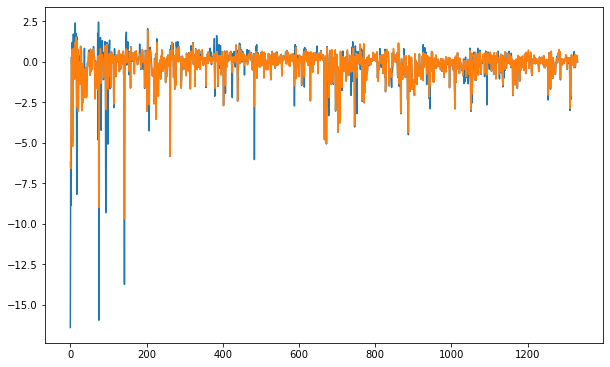

In [79]:
plt.plot(gamma_six_letter[1232])
plt.plot(gamma_six_letter[1032])

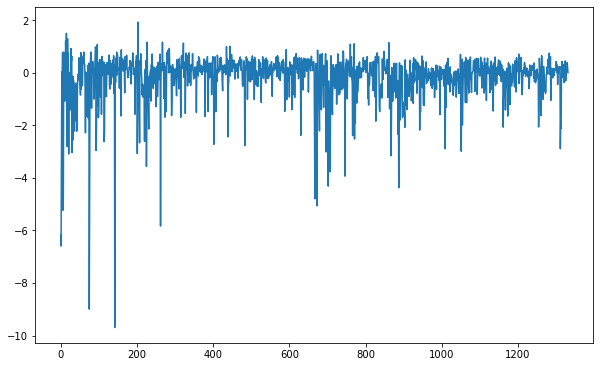

In [78]:
# plt.plot(gamma_six_letter[1232])
plt.plot(gamma_six_letter[1032])

In [32]:
pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_3/gamma_mode_3"
mode3 = get_A_B(pre)
mode = mode3
gamma_mode3 = get_gamma(mode['A'], mode['B'], mode['A_prime'], c=-10, cutoff_range=range(100, 210, 10))

In [33]:
pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_2/gammas/"
mode2 = get_A_B(pre)
mode = mode2
gamma_mode2 = get_gamma(mode['A'], mode['B'], mode['A_prime'], c=-10, cutoff_range=range(100, 210, 10))


In [34]:
mode['A_prime'].min()

2.0052276552864553e-05

In [35]:
mode['A_prime'].max()

14.797518812551525

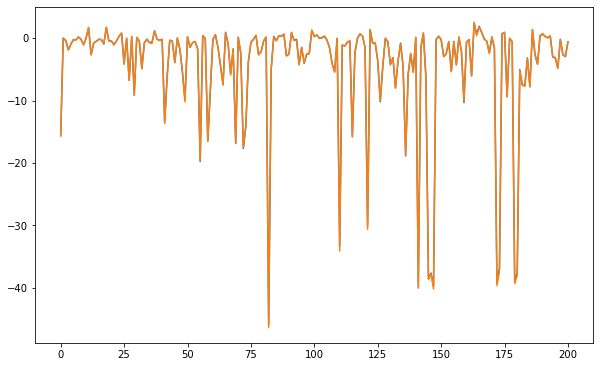

In [37]:
plt.plot(gamma_mode3[180])
plt.plot(gamma_mode2[180])

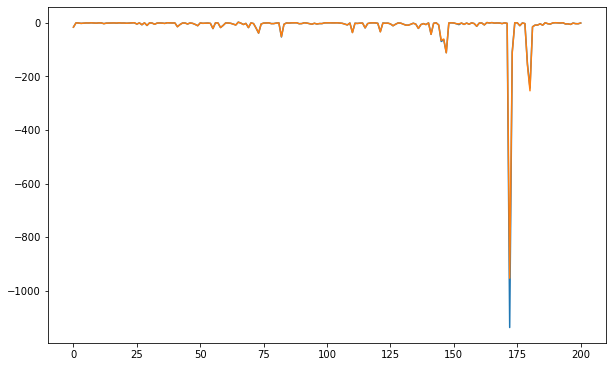

In [38]:
plt.plot(gamma_mode3[200])
plt.plot(gamma_mode2[200])

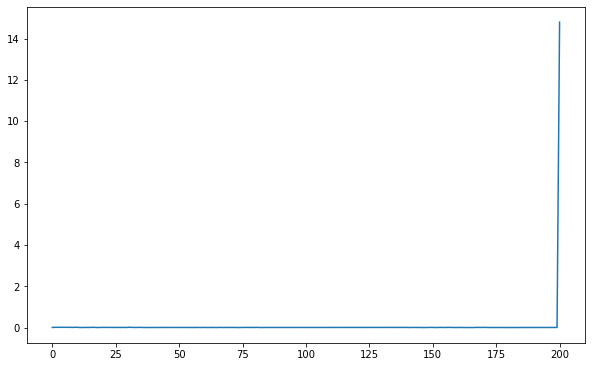

In [39]:
plt.plot(mode3['A_prime'])

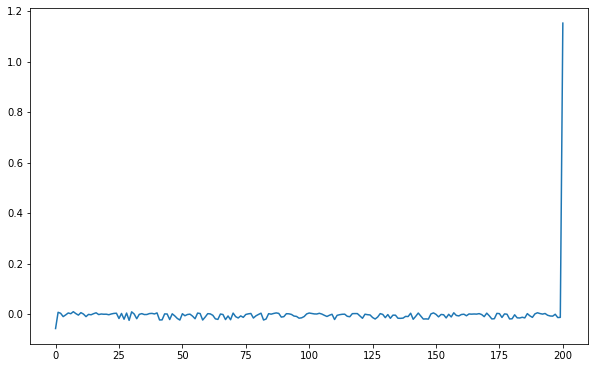

In [40]:
plt.plot(mode3['A'])

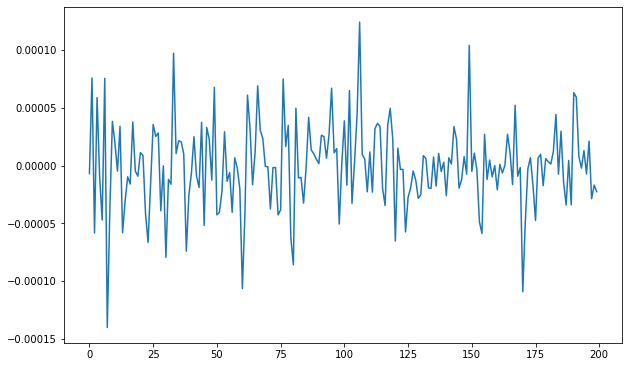

In [8]:
plt.plot(mode3['A']-mode2['A'])

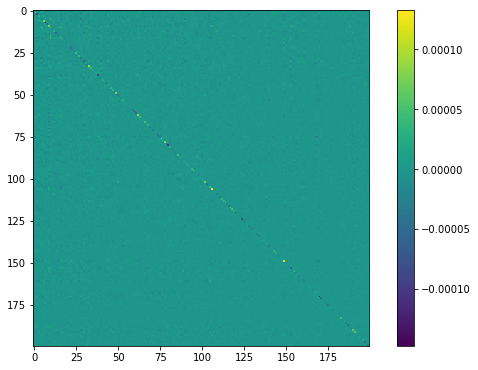

In [12]:
plt.imshow(mode3['B']-mode2['B'])
plt.colorbar()

In [13]:
abs(mode3['B']-mode2['B']).max()

0.00014756452215776775